<a href="https://colab.research.google.com/github/quainhan1110/Top-Song-Spotify/blob/main/TopSongSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/SyncPC/Data Analytic/SpotifyData/data.csv.zip"

Archive:  /content/drive/My Drive/SyncPC/Data Analytic/SpotifyData/data.csv.zip
  inflating: data.csv                


# Load data

In [ ]:
data_df = pd.read_csv("data.csv")
data_df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [ ]:
feature_df = pd.read_csv("/content/drive/My Drive/SyncPC/Data Analytic/SpotifyData/featuresdf.csv")
feature_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   URL         object
 5   Date        object
 6   Region      object
dtypes: int64(2), object(5)
memory usage: 183.8+ MB


In [ ]:
feature_df["duration"] = np.round(feature_df["duration_ms"].values /1000)
feature_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,233713.0,4.0,234.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,228827.0,4.0,229.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,228200.0,4.0,228.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,247160.0,4.0,247.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,288600.0,4.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,239293.0,4.0,239.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,208053.0,4.0,208.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,165387.0,4.0,165.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,214802.0,4.0,215.0


Check songs top 1 in 27/5/2017

In [ ]:
data_df[(data_df["Position"]==1) & (data_df["Date"]=="2017-05-27")]

,Position,Track Name,Artist,Streams,URL,Date,Region
29200,1,Felices los 4,Maluma,34469,https://open.spotify.com/track/0qYTZCo5Bwh1nsU...,2017-05-27,ec
103400,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,232445,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,fr
177600,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,329911,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,ar
251800,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,141129,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,fi
326000,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,386475,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,no
400200,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,235059,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,it
453002,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,6175,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,lt
491199,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,207000,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,ph
565399,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,27440,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,tw
639599,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,81087,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,nz


# Find the track name that has the most streams

In [ ]:
max_streams = data_df.Streams.max()
data_df[data_df.Streams == max_streams]

,Position,Track Name,Artist,Streams,URL,Date,Region
3145443,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,11381520,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,global


# Find all track names that top 1 in each day.

---



In [ ]:
max_streams_by_date_df = data_df.groupby('Date')['Streams'].max().reset_index(name='Streams')
max_streams_by_date_df

,Date,Streams
0,2017-01-01,3135625
1,2017-01-02,3342769
2,2017-01-03,3563076
3,2017-01-04,3619247
4,2017-01-05,3579206
...,...,...
366,2018-01-05,4346638
367,2018-01-06,4208156
368,2018-01-07,3814379
369,2018-01-08,4062918


In [ ]:
data_df.merge(max_streams_by_date_df)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Shape of You,Ed Sheeran,1575915,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-23,us
1,1,Shape of You,Ed Sheeran,2069243,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-03-06,us
2,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,global
3,1,Starboy,The Weeknd,3342769,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-02,global
4,1,Starboy,The Weeknd,3563076,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-03,global
...,...,...,...,...,...,...,...
366,1,rockstar,Post Malone,4346638,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-05,global
367,1,rockstar,Post Malone,4208156,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-06,global
368,1,rockstar,Post Malone,3814379,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-07,global
369,1,rockstar,Post Malone,4062918,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-08,global


# Visualize artists who have more 1 top song


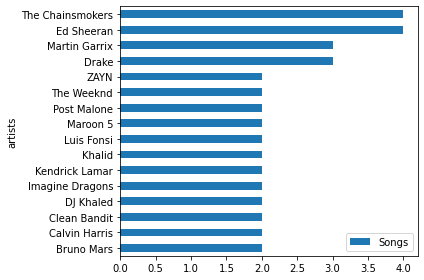

In [ ]:
artist_songs = feature_df.groupby('artists')['name'].count().reset_index(name='Songs')
artist_songs[artist_songs.Songs >= 2].sort_values('Songs').plot(kind='barh',x = 'artists', y = 'Songs')
plt.tight_layout()

# Visualize streams of all top songs per day.


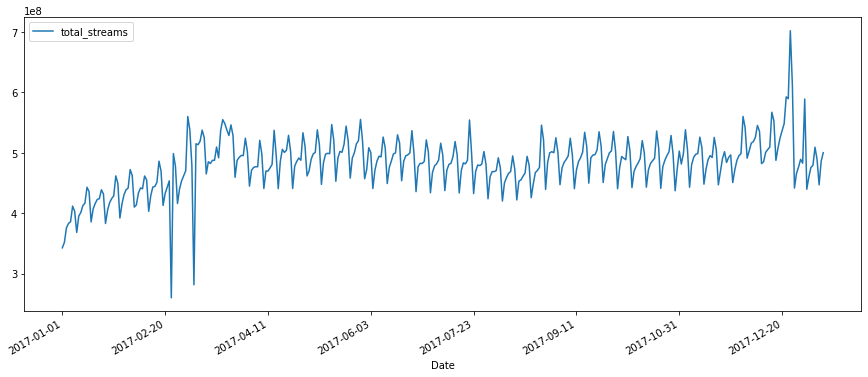

In [ ]:
total_streams_by_date_df = data_df.groupby('Date')['Streams'].sum().reset_index(name='total_streams')
total_streams_by_date_df.plot(x='Date',y='total_streams',figsize=(15,6))
plt.gcf().autofmt_xdate()

# Visualize streams of all top songs per month.

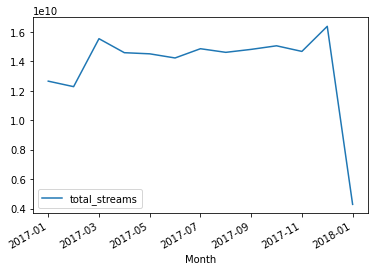

In [ ]:
data_df['Month'] = data_df.Date.apply(lambda x: x[:7])
total_streams_by_month_df = data_df.groupby('Month')['Streams'].sum().reset_index(name='total_streams')
total_streams_by_month_df.plot(x='Month',y='total_streams')
plt.gcf().autofmt_xdate()


# Visualize the top 20 songs have the most play time in US (Region == 'us'*văn bản in nghiêng*)
Note: Play time = Streams * duration

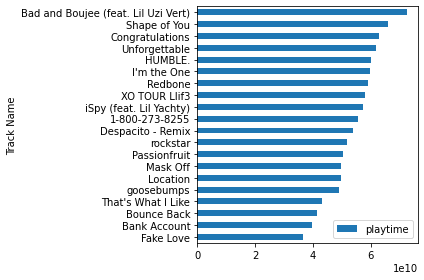

In [ ]:
US_streams_df = data_df[data_df.Region == 'us'].groupby('Track Name')['Streams'].sum().reset_index()
US_playtime_df = pd.merge(US_streams_df,feature_df[['name', 'artists','duration']],left_on='Track Name',right_on='name',how='inner')
US_playtime_df['playtime'] = US_playtime_df.Streams*US_playtime_df.duration
US_playtime_df.sort_values('playtime',ascending=False)[:20].plot(kind='barh',x='Track Name',y = 'playtime')
plt.gca().invert_yaxis()
plt.tight_layout()

# Find the number of days which Ed Sheeran'songs are in top 100 of US ranking.

In [ ]:
EdSheeran_Top100US_df = data_df[(data_df.Artist=='Ed Sheeran') & (data_df.Position <= 100) & (data_df.Region == 'us')]
EdSheeran_Top100US_df.Date = pd.to_datetime(EdSheeran_Top100US_df.Date)
EdSheeran_Top100US_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Position,Track Name,Artist,Streams,URL,Date,Region,Month
772622,1,Shape of You,Ed Sheeran,1517787,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,us,2017-01
772623,2,Castle on the Hill,Ed Sheeran,1472037,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-01-06,us,2017-01
772711,90,Photograph,Ed Sheeran,240747,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-01-06,us,2017-01
772721,100,Thinking Out Loud,Ed Sheeran,225907,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-01-06,us,2017-01
772822,1,Shape of You,Ed Sheeran,1437473,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,us,2017-01
...,...,...,...,...,...,...,...,...
845477,56,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,400409,https://open.spotify.com/track/1bhUWB0zJMIKr9y...,2018-01-08,us,2018-01
845489,68,Shape of You,Ed Sheeran,343620,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-08,us,2018-01
845650,29,Perfect,Ed Sheeran,604450,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2018-01-09,us,2018-01
845677,56,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,411916,https://open.spotify.com/track/1bhUWB0zJMIKr9y...,2018-01-09,us,2018-01


In [ ]:
EdSheeran_Top100US_df.groupby('Track Name')['Date'].count().reset_index(name='days')

,Track Name,days
0,Barcelona,17
1,Bibia Be Ye Ye,14
2,Castle on the Hill,104
3,Dive,31
4,Eraser,14
5,Galway Girl,62
6,Happier,35
7,Hearts Don't Break Around Here,15
8,How Would You Feel (Paean),20
9,Nancy Mulligan,16


# Visualize the position of Shape Of you - Ed Sheeran in top 100 of US ranking. Then, compare all songs position of Ed Sheeran in US ranking.

In [ ]:
ShapeOfYou_USrecord_df = EdSheeran_Top100US_df[(EdSheeran_Top100US_df['Track Name'] == 'Shape of You')].sort_values('Date')
ShapeOfYou_USrecord_df

,Position,Track Name,Artist,Streams,URL,Date,Region,Month
772622,1,Shape of You,Ed Sheeran,1517787,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,us,2017-01
772822,1,Shape of You,Ed Sheeran,1437473,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,us,2017-01
773022,1,Shape of You,Ed Sheeran,1346146,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-08,us,2017-01
773222,1,Shape of You,Ed Sheeran,1532772,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-09,us,2017-01
773423,2,Shape of You,Ed Sheeran,1512685,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-10,us,2017-01
...,...,...,...,...,...,...,...,...
844882,61,Shape of You,Ed Sheeran,362473,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-05,us,2018-01
845083,62,Shape of You,Ed Sheeran,350302,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-06,us,2018-01
845280,59,Shape of You,Ed Sheeran,326365,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-07,us,2018-01
845489,68,Shape of You,Ed Sheeran,343620,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-08,us,2018-01


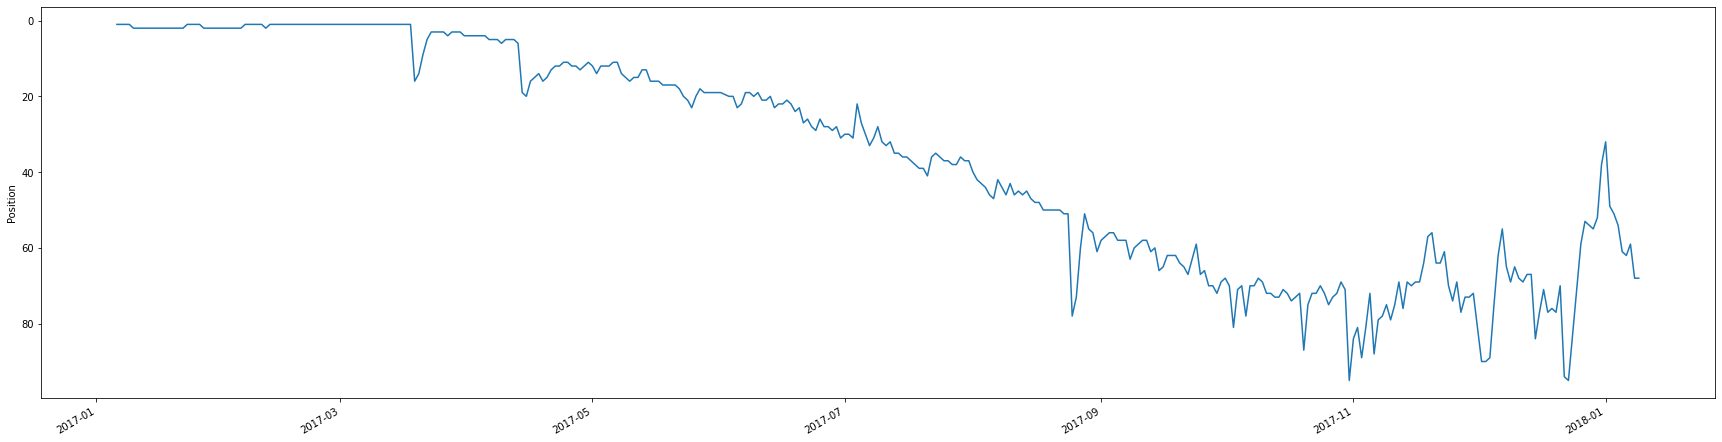

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(ShapeOfYou_USrecord_df.Date,ShapeOfYou_USrecord_df.Position)
plt.gca().invert_yaxis()
plt.ylabel('Position')
plt.gcf().autofmt_xdate()
plt.show()

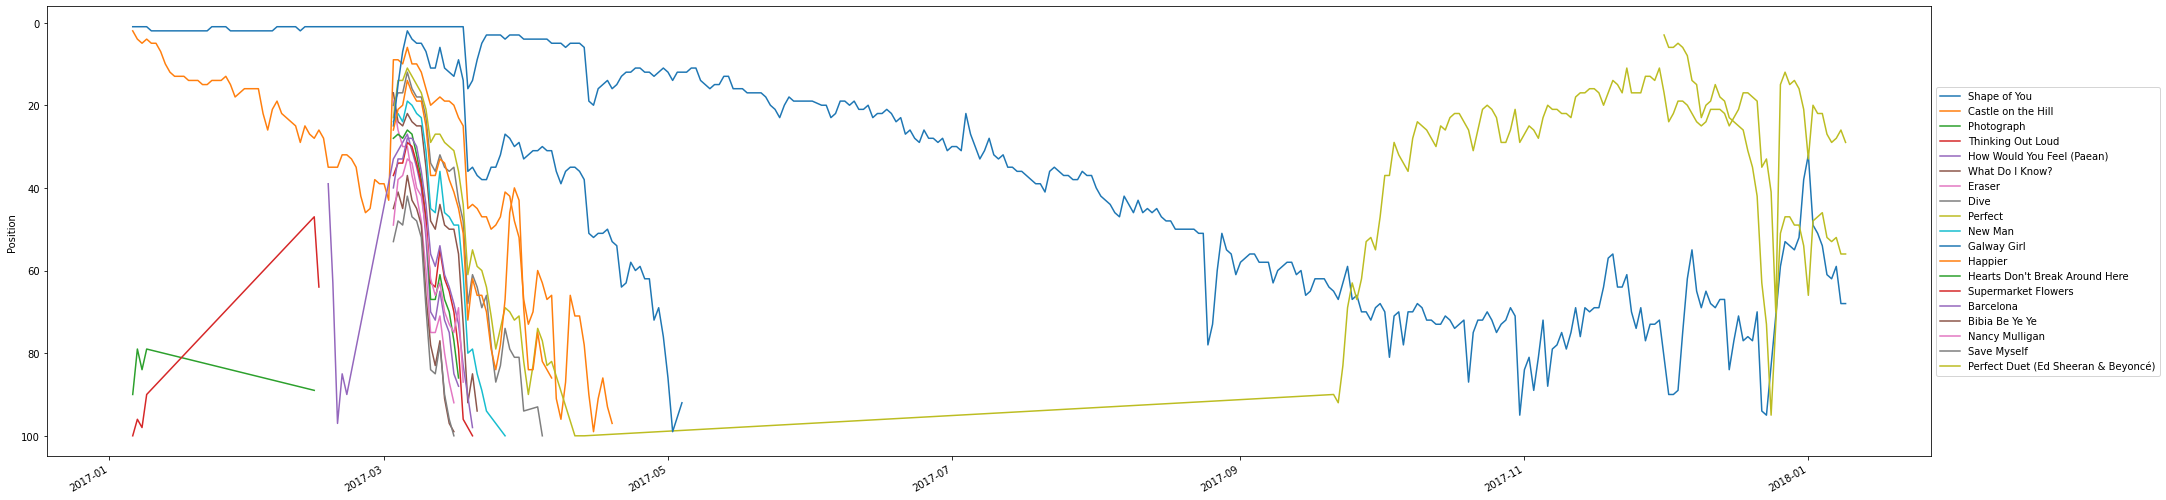

In [ ]:
EdSheeran_songs = EdSheeran_Top100US_df['Track Name'].unique()
plt.figure(figsize=(30,8))
for i in range(len(EdSheeran_songs)):
  tmp = EdSheeran_Top100US_df[EdSheeran_Top100US_df['Track Name'] == EdSheeran_songs[i]]
  plt.plot(tmp.Date,tmp.Position)
plt.gca().invert_yaxis()
plt.legend(EdSheeran_songs,loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.ylabel('Position')
plt.gcf().autofmt_xdate()
plt.show()